<a href="https://colab.research.google.com/github/rinogrego/komputasi-saintifik/blob/main/Prediksi_Harga_Tutup_Saham_XL_dengan_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Harga Tutup Saham XL dengan ARIMA Model

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults, ARMAResults
from sklearn.metrics import mean_squared_error, mean_absolute_error
import io
try: 
  import yfinance as yfinance
except:
  !pip install yfinance
  import yfinance as yf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
# file_id = '1Pk2JuRIqyJaJnSWMQaHyIcpdGF_WvlHF'
# request = drive_service.files().get_media(fileId=file_id)
# fh = io.BytesIO()
# downloader = MediaIoBaseDownload(fh, request)
# done = False
# while done is False:
#     status, done = downloader.next_chunk()
#     print("Download %d%%." % int(status.progress() * 100))
!wget -O EXCL.JK.csv --no-check-certificate "https://drive.google.com/file/d/1acP2ebwQxxcZ2k7W9SviyWAJwXkN_h9n/"

--2021-12-13 07:19:50--  https://drive.google.com/file/d/1acP2ebwQxxcZ2k7W9SviyWAJwXkN_h9n/
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.113, 142.250.141.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1acP2ebwQxxcZ2k7W9SviyWAJwXkN_h9n/edit [following]
--2021-12-13 07:19:51--  https://drive.google.com/file/d/1acP2ebwQxxcZ2k7W9SviyWAJwXkN_h9n/edit
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/file/d/1acP2ebwQxxcZ2k7W9SviyWAJwXkN_h9n/edit&followup=https://drive.google.com/file/d/1acP2ebwQxxcZ2k7W9SviyWAJwXkN_h9n/edit [following]
--2021-12-13 07:19:51--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&contin

In [ ]:
df_yf = yf.download('EXCL.JK', 
                      start='2011-11-23', 
                      end='2021-11-22', 
                      progress=False,
)
df_yf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-23,4537.397461,4636.036621,4512.737793,4537.397461,4145.703613,5062902
2011-11-24,4562.057129,4562.057129,4463.418457,4562.057129,4168.233887,1194252
2011-11-25,4512.737793,4685.355957,4512.737793,4512.737793,4123.171875,9806458
2011-11-28,4488.078125,4562.057129,4438.758301,4488.078125,4100.641602,1677834
2011-11-29,4562.057129,4586.717285,4488.078125,4562.057129,4168.233887,5328517


In [ ]:
PATH = '/content/EXCL.JK.csv'
# PATH = 'https://drive.google.com/file/d/1acP2ebwQxxcZ2k7W9SviyWAJwXkN_h9n/view?'
df = pd.read_csv(PATH)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-23,4537.397461,4636.036621,4512.737793,4537.397461,4145.703125,5062902.0
1,2011-11-24,4562.057129,4562.057129,4463.418457,4562.057129,4168.234375,1194252.0
2,2011-11-25,4512.737793,4685.355957,4512.737793,4512.737793,4123.172852,9806458.0
3,2011-11-28,4488.078125,4562.057129,4438.758301,4488.078125,4100.641602,1677834.0
4,2011-11-29,4562.057129,4586.717285,4488.078125,4562.057129,4168.234375,5328517.0


In [ ]:
# menemukan baris dengan nilai null
df[df['Close'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
1888,2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# menghapus row 1888
df = df.drop(df.index[[1888]], axis = 0)
df[df['Close'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume


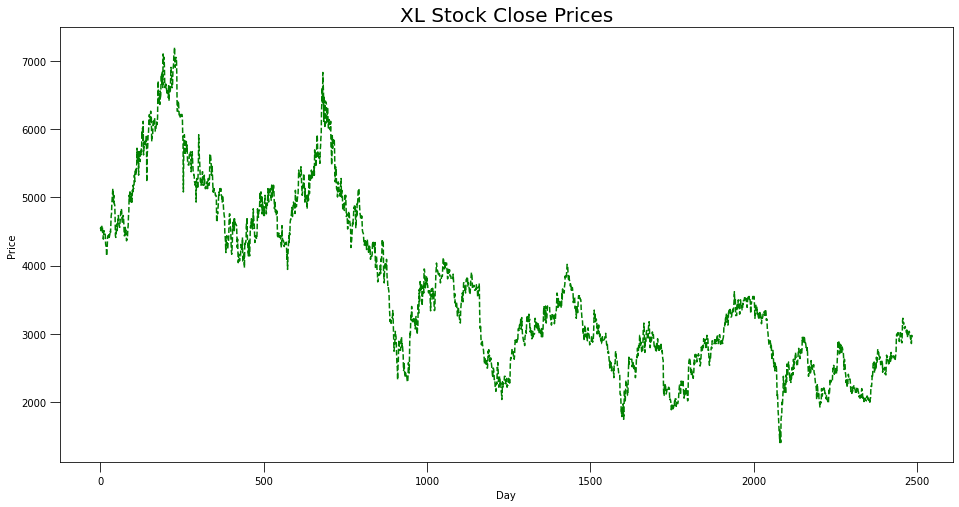

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], 'g--')
plt.title('XL Stock Close Prices', color='black', size=20)
plt.xlabel("Day", color="black", size=10)
plt.ylabel("Price", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)

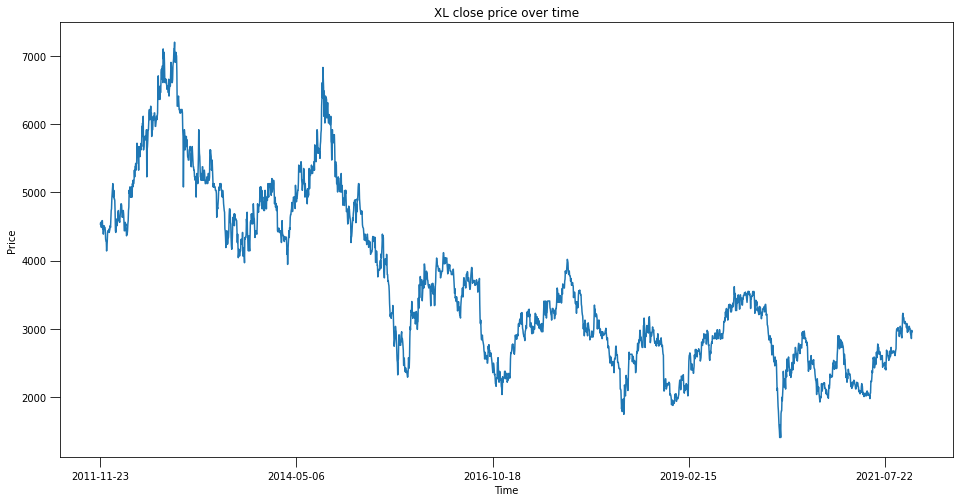

In [ ]:
# PLOT XL STOCK PRICE

RANGE = len(df["Close"])
plt.figure(figsize=(16,8))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0, RANGE, 600), df['Date'][0:RANGE:600])
plt.title("XL close price over time", color="black")
plt.xlabel("Time", color="black", size=10)
plt.ylabel("Price", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
plt.show()

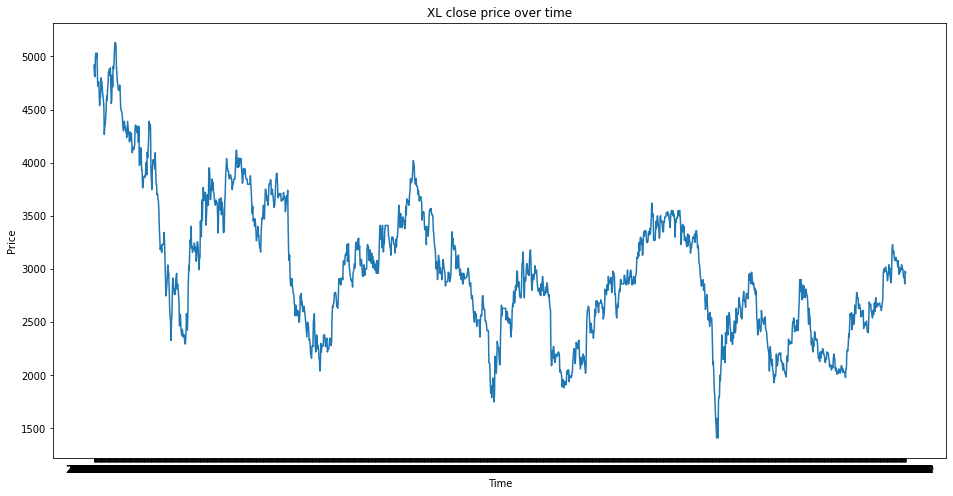

In [ ]:
# PLOT XL STOCK PRICE, LAST 30% DATA

RANGE = len(df["Close"])
LAST_30 = int(RANGE * 3/10)
plt.figure(figsize=(16,8))
plt.plot(df["Date"][LAST_30:], df["Close"][LAST_30:])
# plt.xticks(np.arange(0, RANGE, 600), df['Date'][0:RANGE:600])
plt.title("XL close price over time")
plt.xlabel("Time", color="black", size=10)
plt.ylabel("Price", color="black", size=10)
# plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
# plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
plt.show()

### ORDER (0, 0, 0)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 0
ORDER_D = 0
ORDER_Q = 0
for time_point in range(N_test_observations):
    print("time_point:", time_point)
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 1
time_point: 2
time_point: 3
time_point: 4
time_point: 5
time_point: 6
time_point: 7
time_point: 8
time_point: 9
time_point: 10
time_point: 11
time_point: 12
time_point: 13
time_point: 14
time_point: 15
time_point: 16
time_point: 17
time_point: 18
time_point: 19
time_point: 20
time_point: 21
time_point: 22
time_point: 23
time_point: 24
time_point: 25
time_point: 26
time_point: 27
time_point: 28
time_point: 29
time_point: 30
time_point: 31
time_point: 32
time_point: 33
time_point: 34
time_point: 35
time_point: 36
time_point: 37
time_point: 38
time_point: 39
time_point: 40
time_point: 41
time_point: 42
time_point: 43
time_point: 44
time_point: 45
time_point: 46
time_point: 47
time_point: 48
time_point: 49
time_point: 50
time_point: 51
time_point: 52
time_point: 53
time_point: 54
time_point: 55
time_point: 56
time_point: 57
time_point: 58
time_point: 59
time_point: 60
time_point: 61
time_point: 62
time_point: 63
time_point: 64
time_point: 65
time_point: 66
time_

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 290
time_point: 291
time_point: 292
time_point: 293
time_point: 294
time_point: 295
time_point: 296
time_point: 297
time_point: 298
time_point: 299
time_point: 300
time_point: 301
time_point: 302
time_point: 303
time_point: 304
time_point: 305
time_point: 306
time_point: 307
time_point: 308
time_point: 309
time_point: 310
time_point: 311
time_point: 312
time_point: 313
time_point: 314
time_point: 315
time_point: 316
time_point: 317
time_point: 318
time_point: 319
time_point: 320
time_point: 321
time_point: 322
time_point: 323
time_point: 324
time_point: 325
time_point: 326
time_point: 327
time_point: 328
time_point: 329
time_point: 330
time_point: 331
time_point: 332
time_point: 333
time_point: 334
time_point: 335
time_point: 336
time_point: 337
time_point: 338
time_point: 339
time_point: 340
time_point: 341
time_point: 342
time_point: 343
time_point: 344
time_point: 345
time_point: 346
time_point: 347
time_point: 348
time_point: 349
time_point: 350
time_point: 351
time_poi

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 584
time_point: 585
time_point: 586
time_point: 587
time_point: 588
time_point: 589
time_point: 590
time_point: 591
time_point: 592
time_point: 593
time_point: 594
time_point: 595
time_point: 596
time_point: 597
time_point: 598
time_point: 599
time_point: 600
time_point: 601
time_point: 602
time_point: 603
time_point: 604
time_point: 605
time_point: 606
time_point: 607
time_point: 608
time_point: 609
time_point: 610
time_point: 611
time_point: 612
time_point: 613
time_point: 614
time_point: 615
time_point: 616
time_point: 617
time_point: 618
time_point: 619
time_point: 620
time_point: 621
time_point: 622
time_point: 623
time_point: 624
time_point: 625
time_point: 626
time_point: 627
time_point: 628
time_point: 629
time_point: 630
time_point: 631
time_point: 632
time_point: 633
time_point: 634
time_point: 635
time_point: 636
time_point: 637
time_point: 638
time_point: 639
time_point: 640
time_point: 641
time_point: 642
time_point: 643
time_point: 644
time_point: 645
time_poi

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 690
time_point: 691
time_point: 692
time_point: 693
time_point: 694
time_point: 695
time_point: 696
time_point: 697
time_point: 698
time_point: 699
time_point: 700
time_point: 701
time_point: 702
time_point: 703
time_point: 704
time_point: 705
time_point: 706
time_point: 707
time_point: 708
time_point: 709
time_point: 710
time_point: 711
time_point: 712
time_point: 713
time_point: 714
time_point: 715
time_point: 716
time_point: 717
time_point: 718
time_point: 719
time_point: 720
time_point: 721
time_point: 722
time_point: 723
time_point: 724
time_point: 725
time_point: 726
time_point: 727
time_point: 728
time_point: 729
time_point: 730
time_point: 731
time_point: 732
time_point: 733
time_point: 734
time_point: 735
time_point: 736
time_point: 737
time_point: 738
time_point: 739
time_point: 740
time_point: 741
time_point: 742
time_point: 743
time_point: 744
time_point: 745

ORDER (0, 0, 0)
Testing Mean Squared Error is 1684686.7716007782
Testing Rooted Mean Squared Error is 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


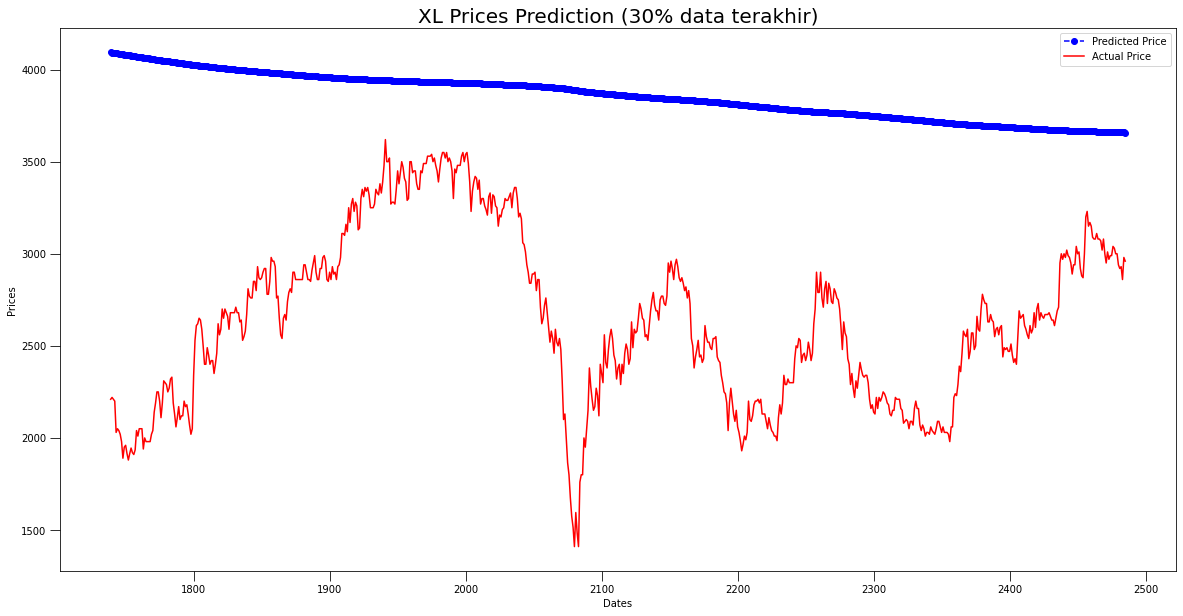

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20)
plt.xlabel("Dates", size=10)
plt.ylabel("Prices", size=10)
plt.tick_params(axis='x', size=10, labelsize=10)
plt.tick_params(axis='y', size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (0, 0, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 0
ORDER_D = 0
ORDER_Q = 1
for time_point in range(N_test_observations):
    print("time_point:", time_point)
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 1
time_point: 2
time_point: 3
time_point: 4
time_point: 5
time_point: 6
time_point: 7
time_point: 8
time_point: 9
time_point: 10
time_point: 11
time_point: 12
time_point: 13
time_point: 14
time_point: 15
time_point: 16
time_point: 17
time_point: 18
time_point: 19
time_point: 20
time_point: 21
time_point: 22
time_point: 23
time_point: 24
time_point: 25
time_point: 26
time_point: 27
time_point: 28
time_point: 29
time_point: 30
time_point: 31
time_point: 32
time_point: 33
time_point: 34
time_point: 35
time_point: 36
time_point: 37
time_point: 38
time_point: 39
time_point: 40
time_point: 41
time_point: 42
time_point: 43
time_point: 44
time_point: 45
time_point: 46
time_point: 47
time_point: 48
time_point: 49
time_point: 50
time_point: 51
time_point: 52
time_point: 53
time_point: 54
time_point: 55
time_point: 56
time_point: 57
time_point: 58
time_point: 59
time_point: 60
time_point: 61
time_point: 62
time_point: 63
time_point: 64
time_point: 65
time_point: 66
time_

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 367
time_point: 368
time_point: 369
time_point: 370
time_point: 371
time_point: 372
time_point: 373
time_point: 374
time_point: 375
time_point: 376
time_point: 377
time_point: 378
time_point: 379
time_point: 380
time_point: 381
time_point: 382
time_point: 383
time_point: 384
time_point: 385
time_point: 386
time_point: 387
time_point: 388
time_point: 389
time_point: 390
time_point: 391
time_point: 392
time_point: 393
time_point: 394
time_point: 395
time_point: 396
time_point: 397
time_point: 398
time_point: 399
time_point: 400
time_point: 401
time_point: 402
time_point: 403
time_point: 404
time_point: 405
time_point: 406
time_point: 407
time_point: 408
time_point: 409
time_point: 410
time_point: 411
time_point: 412
time_point: 413
time_point: 414
time_point: 415
time_point: 416
time_point: 417
time_point: 418
time_point: 419
time_point: 420
time_point: 421
time_point: 422
time_point: 423
time_point: 424
time_point: 425
time_point: 426
time_point: 427
time_point: 428
time_poi

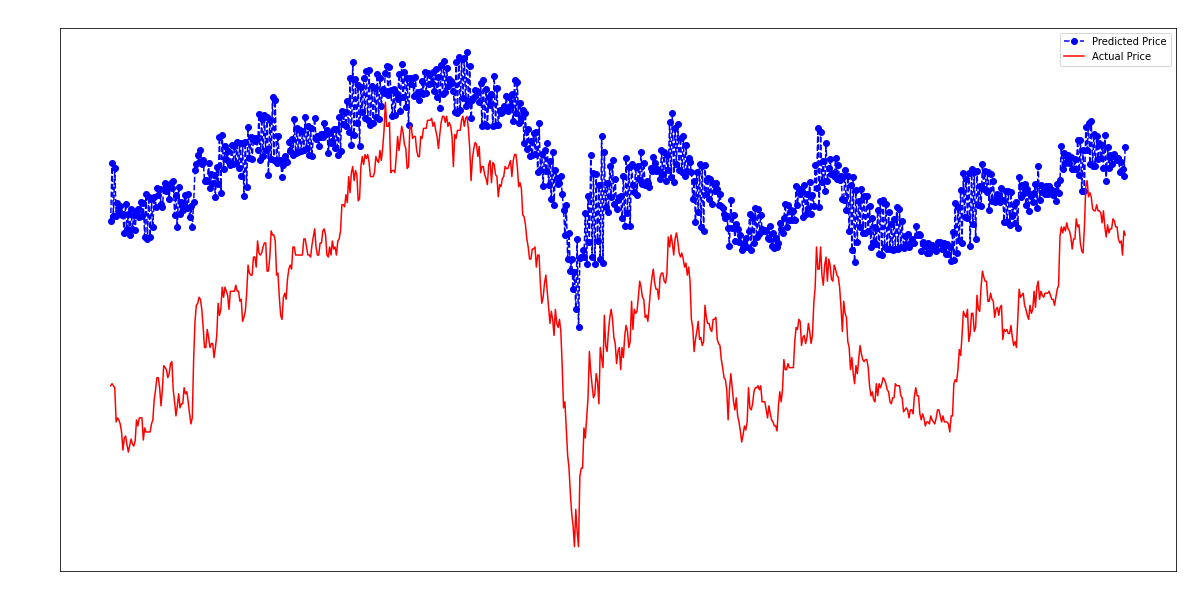

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (0, 1, 0)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 0
ORDER_D = 1
ORDER_Q = 0
for time_point in range(N_test_observations):
    print("time_point:", time_point)
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 1
time_point: 2
time_point: 3
time_point: 4
time_point: 5
time_point: 6
time_point: 7
time_point: 8
time_point: 9
time_point: 10
time_point: 11
time_point: 12
time_point: 13
time_point: 14
time_point: 15
time_point: 16
time_point: 17
time_point: 18
time_point: 19
time_point: 20
time_point: 21
time_point: 22
time_point: 23
time_point: 24
time_point: 25
time_point: 26
time_point: 27
time_point: 28
time_point: 29
time_point: 30
time_point: 31
time_point: 32
time_point: 33
time_point: 34
time_point: 35
time_point: 36
time_point: 37
time_point: 38
time_point: 39
time_point: 40
time_point: 41
time_point: 42
time_point: 43
time_point: 44
time_point: 45
time_point: 46
time_point: 47
time_point: 48
time_point: 49
time_point: 50
time_point: 51
time_point: 52
time_point: 53
time_point: 54
time_point: 55
time_point: 56
time_point: 57
time_point: 58
time_point: 59
time_point: 60
time_point: 61
time_point: 62
time_point: 63
time_point: 64
time_point: 65
time_point: 66
time_

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 94
time_point: 95
time_point: 96
time_point: 97
time_point: 98
time_point: 99
time_point: 100
time_point: 101
time_point: 102
time_point: 103
time_point: 104
time_point: 105
time_point: 106
time_point: 107
time_point: 108
time_point: 109
time_point: 110
time_point: 111
time_point: 112
time_point: 113
time_point: 114
time_point: 115
time_point: 116
time_point: 117
time_point: 118
time_point: 119
time_point: 120
time_point: 121
time_point: 122
time_point: 123
time_point: 124
time_point: 125
time_point: 126
time_point: 127
time_point: 128
time_point: 129
time_point: 130
time_point: 131
time_point: 132
time_point: 133
time_point: 134
time_point: 135
time_point: 136
time_point: 137
time_point: 138
time_point: 139
time_point: 140
time_point: 141
time_point: 142
time_point: 143
time_point: 144
time_point: 145
time_point: 146
time_point: 147
time_point: 148
time_point: 149
time_point: 150
time_point: 151
time_point: 152
time_point: 153
time_point: 154
time_point: 155
time_point: 15

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 192
time_point: 193
time_point: 194
time_point: 195
time_point: 196
time_point: 197
time_point: 198
time_point: 199
time_point: 200
time_point: 201
time_point: 202
time_point: 203
time_point: 204
time_point: 205
time_point: 206
time_point: 207
time_point: 208
time_point: 209
time_point: 210
time_point: 211
time_point: 212
time_point: 213
time_point: 214
time_point: 215
time_point: 216
time_point: 217
time_point: 218
time_point: 219
time_point: 220
time_point: 221
time_point: 222
time_point: 223
time_point: 224
time_point: 225
time_point: 226
time_point: 227
time_point: 228
time_point: 229
time_point: 230
time_point: 231
time_point: 232
time_point: 233
time_point: 234
time_point: 235
time_point: 236
time_point: 237
time_point: 238
time_point: 239
time_point: 240
time_point: 241
time_point: 242
time_point: 243
time_point: 244
time_point: 245
time_point: 246
time_point: 247
time_point: 248
time_point: 249


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 250
time_point: 251
time_point: 252
time_point: 253
time_point: 254
time_point: 255
time_point: 256
time_point: 257
time_point: 258
time_point: 259
time_point: 260
time_point: 261
time_point: 262
time_point: 263
time_point: 264
time_point: 265
time_point: 266
time_point: 267
time_point: 268
time_point: 269
time_point: 270
time_point: 271
time_point: 272
time_point: 273
time_point: 274
time_point: 275
time_point: 276
time_point: 277
time_point: 278
time_point: 279
time_point: 280
time_point: 281
time_point: 282
time_point: 283
time_point: 284
time_point: 285
time_point: 286
time_point: 287
time_point: 288
time_point: 289
time_point: 290
time_point: 291
time_point: 292
time_point: 293
time_point: 294
time_point: 295
time_point: 296
time_point: 297
time_point: 298
time_point: 299
time_point: 300
time_point: 301
time_point: 302
time_point: 303
time_point: 304
time_point: 305
time_point: 306
time_point: 307
time_point: 308
time_point: 309
time_point: 310
time_point: 311
time_poi

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 378
time_point: 379
time_point: 380
time_point: 381
time_point: 382
time_point: 383
time_point: 384
time_point: 385
time_point: 386
time_point: 387
time_point: 388
time_point: 389
time_point: 390
time_point: 391
time_point: 392
time_point: 393
time_point: 394
time_point: 395
time_point: 396
time_point: 397
time_point: 398
time_point: 399
time_point: 400
time_point: 401
time_point: 402
time_point: 403
time_point: 404
time_point: 405
time_point: 406
time_point: 407
time_point: 408
time_point: 409
time_point: 410
time_point: 411
time_point: 412
time_point: 413
time_point: 414
time_point: 415
time_point: 416
time_point: 417
time_point: 418
time_point: 419
time_point: 420
time_point: 421
time_point: 422
time_point: 423
time_point: 424
time_point: 425
time_point: 426
time_point: 427
time_point: 428
time_point: 429
time_point: 430
time_point: 431
time_point: 432
time_point: 433
time_point: 434
time_point: 435
time_point: 436
time_point: 437
time_point: 438
time_point: 439
time_poi

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 599
time_point: 600
time_point: 601
time_point: 602
time_point: 603
time_point: 604
time_point: 605
time_point: 606
time_point: 607
time_point: 608
time_point: 609
time_point: 610
time_point: 611
time_point: 612
time_point: 613
time_point: 614
time_point: 615
time_point: 616
time_point: 617
time_point: 618
time_point: 619
time_point: 620
time_point: 621
time_point: 622
time_point: 623
time_point: 624
time_point: 625
time_point: 626
time_point: 627
time_point: 628
time_point: 629
time_point: 630
time_point: 631
time_point: 632
time_point: 633
time_point: 634
time_point: 635
time_point: 636
time_point: 637
time_point: 638
time_point: 639
time_point: 640
time_point: 641
time_point: 642
time_point: 643
time_point: 644
time_point: 645
time_point: 646
time_point: 647
time_point: 648
time_point: 649
time_point: 650
time_point: 651
time_point: 652
time_point: 653
time_point: 654
time_point: 655
time_point: 656
time_point: 657
time_point: 658
time_point: 659
time_point: 660
time_poi

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


687
time_point: 688
time_point: 689
time_point: 690
time_point: 691
time_point: 692
time_point: 693
time_point: 694
time_point: 695
time_point: 696
time_point: 697
time_point: 698
time_point: 699
time_point: 700
time_point: 701
time_point: 702
time_point: 703
time_point: 704
time_point: 705
time_point: 706
time_point: 707
time_point: 708
time_point: 709
time_point: 710
time_point: 711
time_point: 712
time_point: 713
time_point: 714
time_point: 715
time_point: 716
time_point: 717
time_point: 718
time_point: 719
time_point: 720
time_point: 721
time_point: 722
time_point: 723
time_point: 724
time_point: 725
time_point: 726
time_point: 727
time_point: 728
time_point: 729
time_point: 730
time_point: 731
time_point: 732
time_point: 733
time_point: 734
time_point: 735
time_point: 736
time_point: 737
time_point: 738
time_point: 739
time_point: 740
time_point: 741
time_point: 742
time_point: 743
time_point: 744
time_point: 745

ORDER (0, 1, 0)
Testing Mean Squared Error is 4981.544882341593
Tes

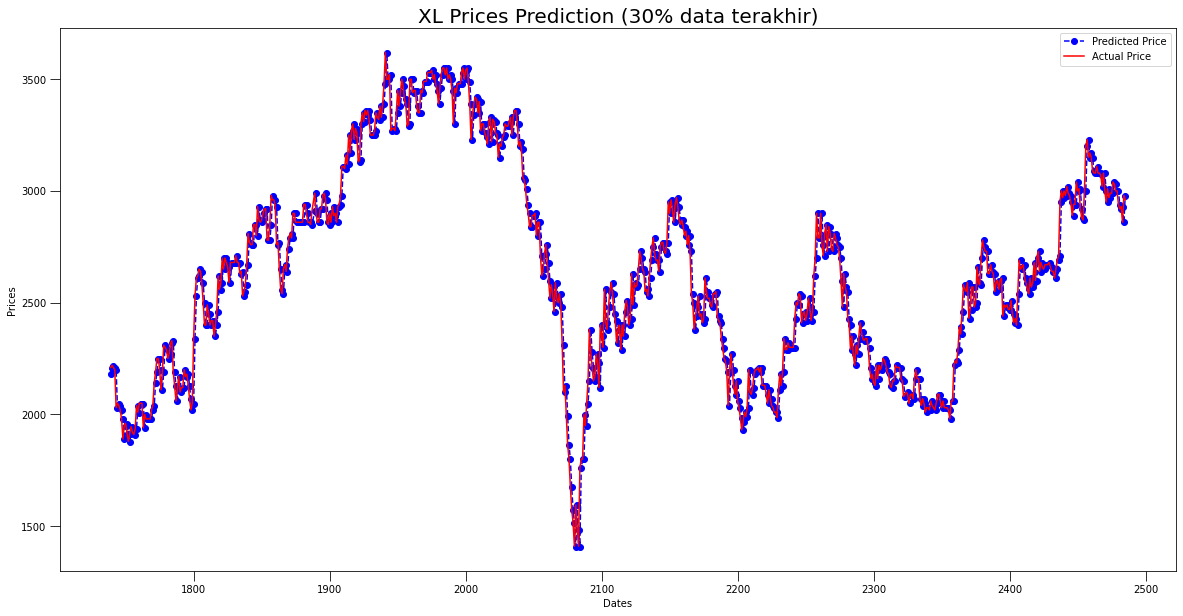

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 0, 0)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 0
ORDER_Q = 0
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 50
time_point: 100


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 150
time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (1, 0, 0)
Testing Mean Squared Error is 4973.497355212015
Testing Rooted Mean Squared Error is 70.52302712740013
Testing Mean Absolute Error is 52.20223537795731


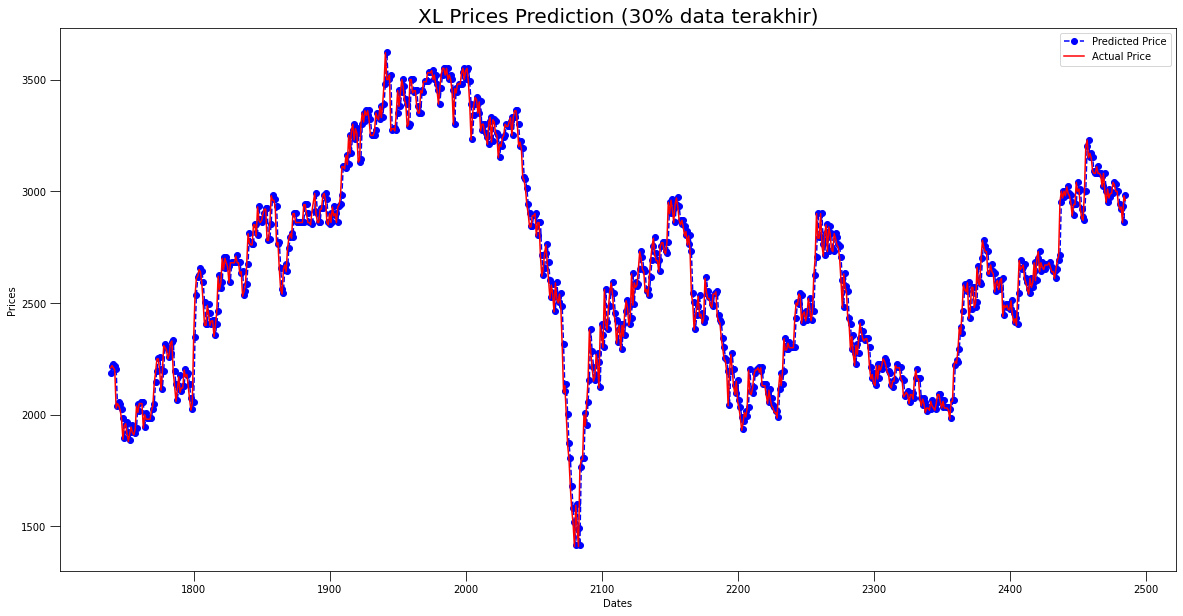

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (0, 1, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 0
ORDER_D = 1
ORDER_Q = 1
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 300
time_point: 350
time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (0, 1, 1)
Testing Mean Squared Error is 4998.150836226998
Testing Rooted Mean Squared Error is 70.69760134705419
Testing Mean Absolute Error is 51.500656901008036


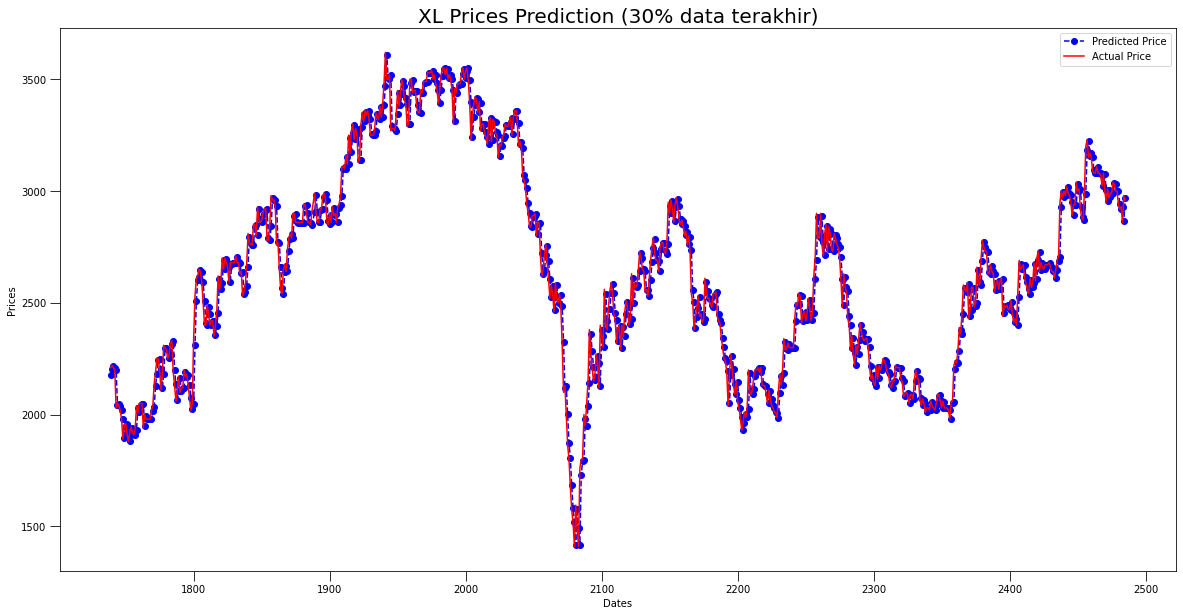

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 0, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 0
ORDER_Q = 1
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 200


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 250


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 300
time_point: 350


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (1, 0, 1)
Testing Mean Squared Error is 4989.218827394246
Testing Rooted Mean Squared Error is 70.63440257689058
Testing Mean Absolute Error is 51.980734097524


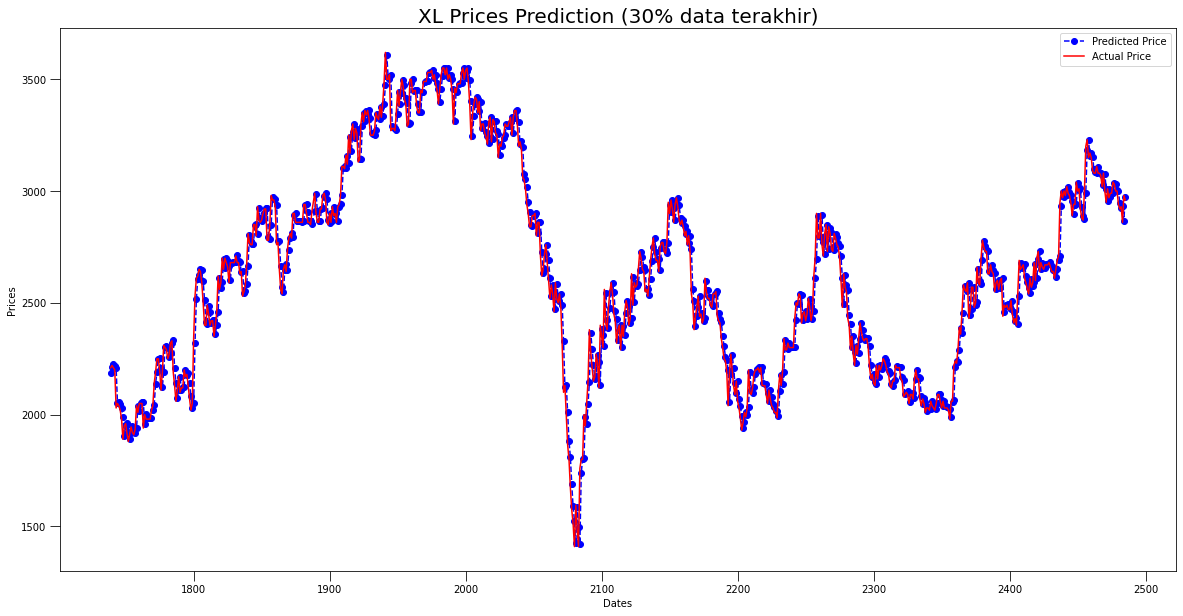

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 1, 0)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 1
ORDER_Q = 0
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (1, 1, 0)
Testing Mean Squared Error is 4999.817145486552
Testing Rooted Mean Squared Error is 70.70938513016891
Testing Mean Absolute Error is 51.53214459237049


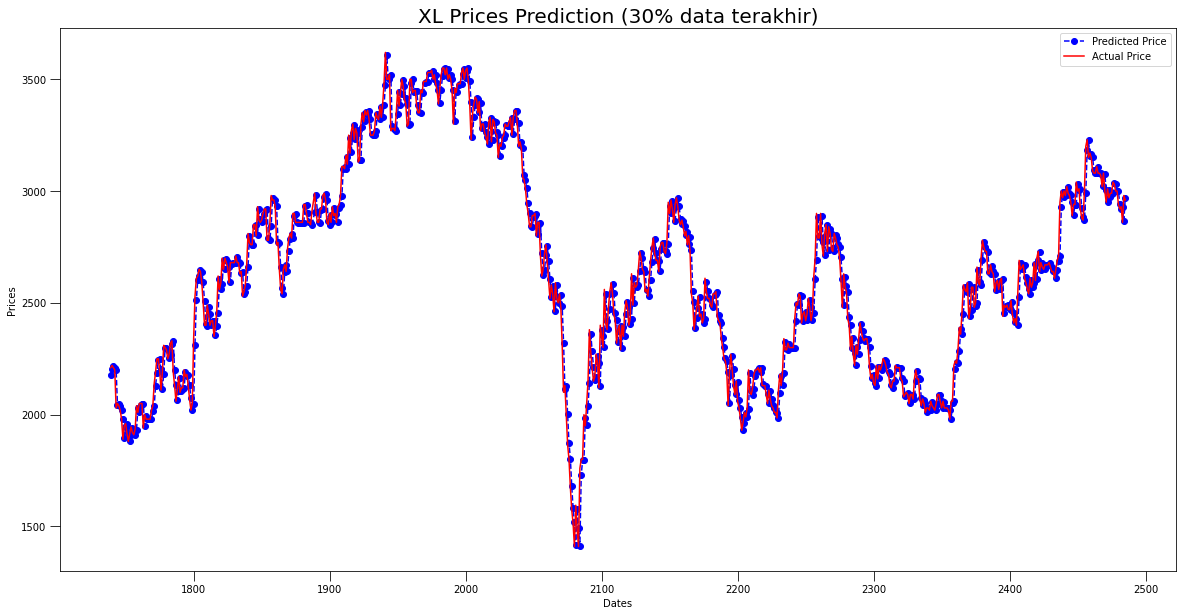

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 1, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 1
ORDER_Q = 1
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (1, 1, 1)
Testing Mean Squared Error is 5014.752226437875
Testing Rooted Mean Squared Error is 70.81491528228976
Testing Mean Absolute Error is 51.53113139121979


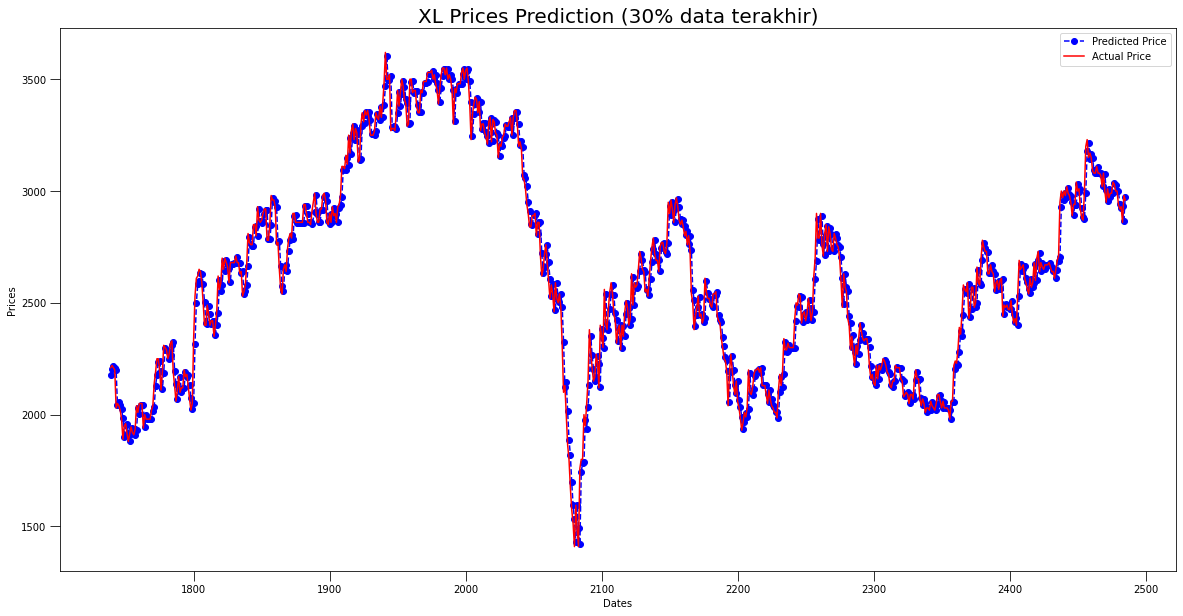

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 0, 2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 0
ORDER_Q = 2
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (1, 0, 2)
Testing Mean Squared Error is 4981.45504956406
Testing Rooted Mean Squared Error is 70.57942369815767
Testing Mean Absolute Error is 51.88973108399691


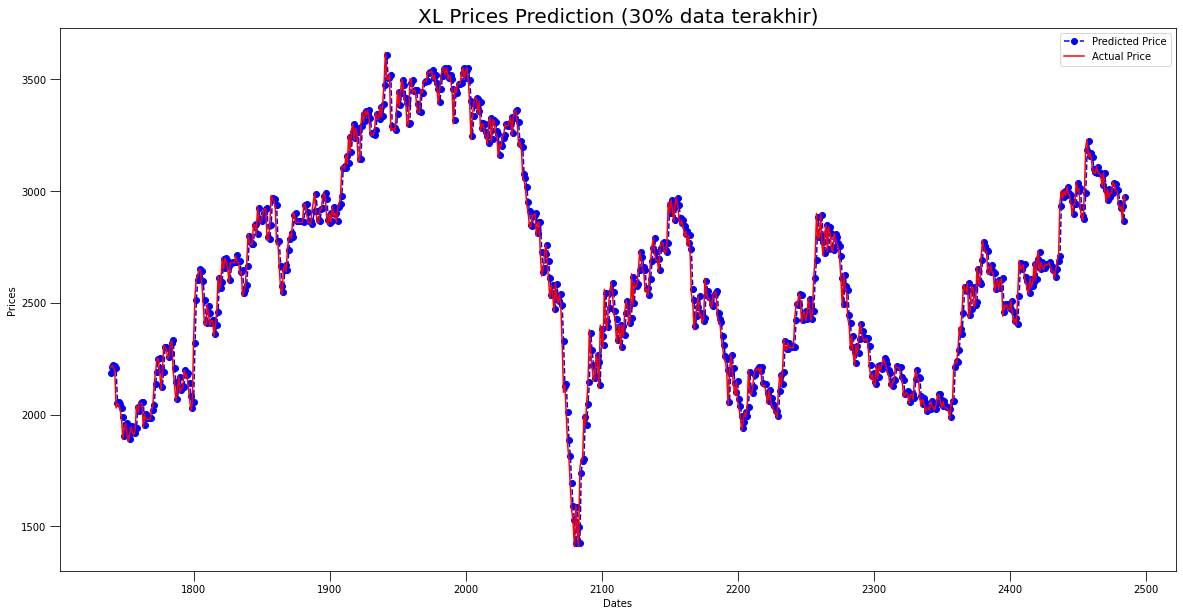

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 1, 2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 1
ORDER_Q = 2
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0


ValueError: ignored

ValueError: ignored

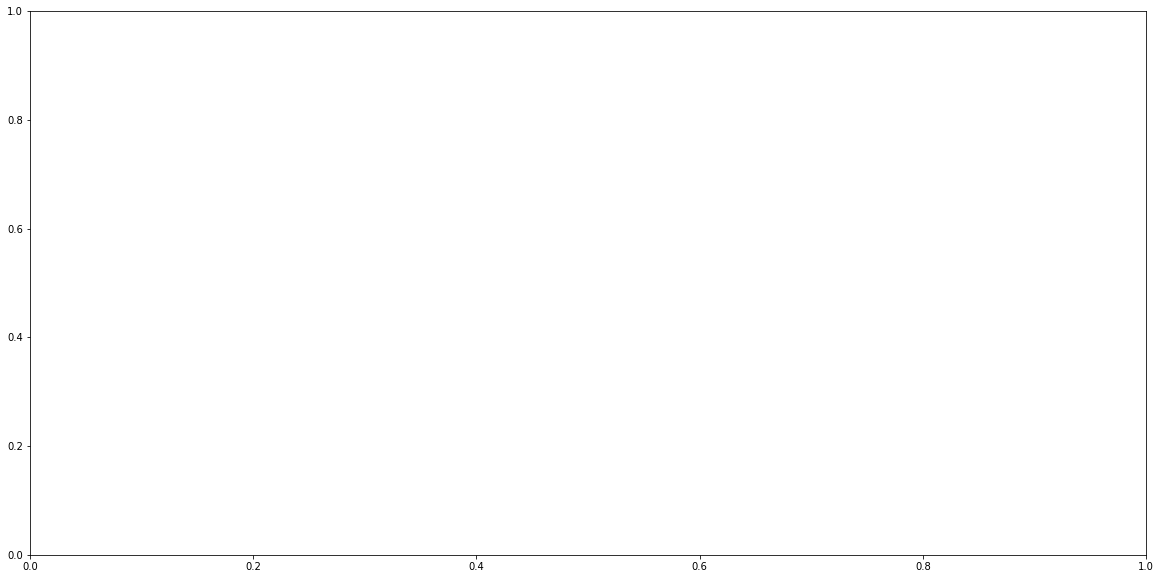

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 2, 0)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 2
ORDER_Q = 0
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400
time_point: 450
time_point: 500


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (1, 2, 0)
Testing Mean Squared Error is 7893.181821328193
Testing Rooted Mean Squared Error is 88.84358064220618
Testing Mean Absolute Error is 67.5633071238122


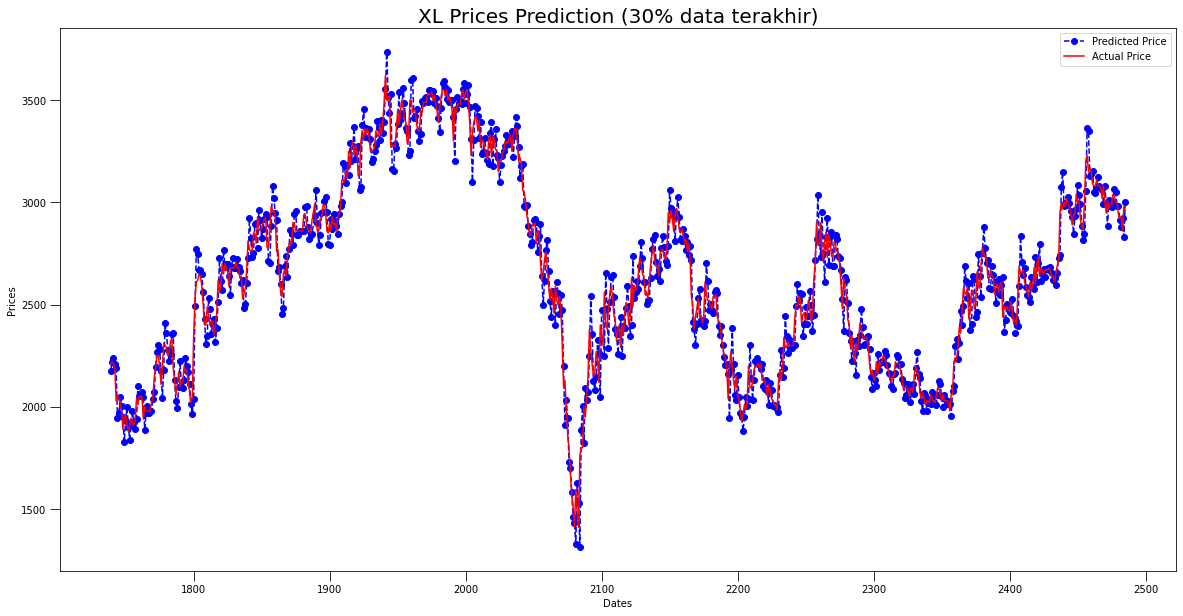

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 2, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 2
ORDER_Q = 1
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250
time_point: 300


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 350
time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (1, 2, 1)
Testing Mean Squared Error is 5012.746352754874
Testing Rooted Mean Squared Error is 70.80075107479351
Testing Mean Absolute Error is 51.564553805919516


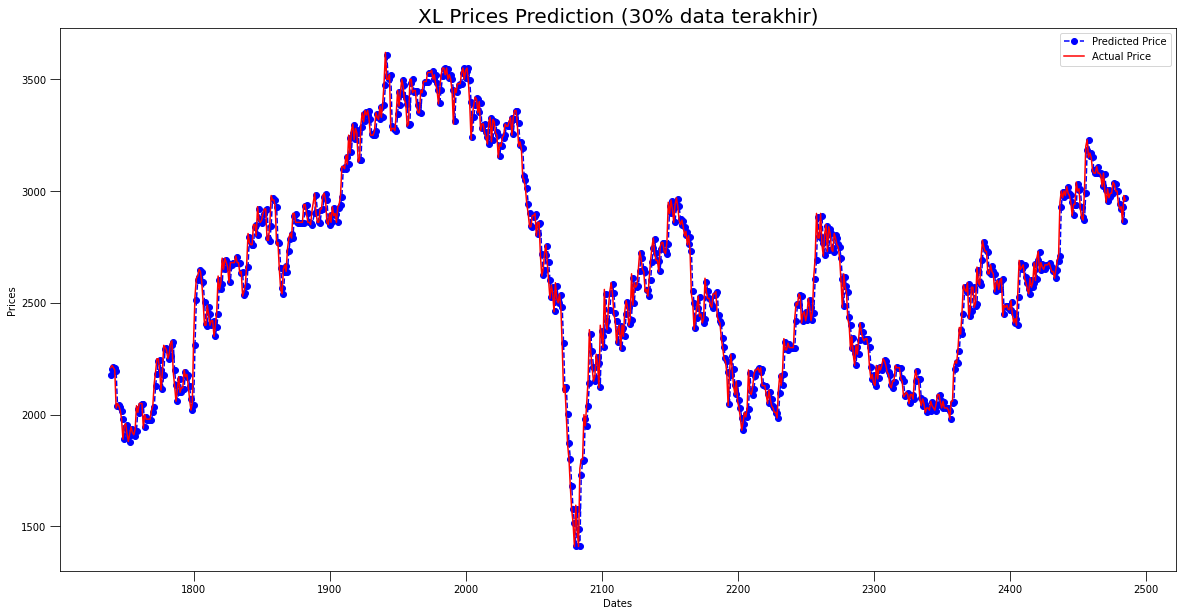

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (1, 2, 2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 1
ORDER_D = 2
ORDER_Q = 2
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting 

time_point: 50


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 100


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 150


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

time_point: 200


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

time_point: 250


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

time_point: 300


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist

time_point: 350


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist

time_point: 400


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/lo

time_point: 450


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

time_point: 500


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 550


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

time_point: 600


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

time_point: 650


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 700


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)



ORDER (1, 2, 2)
Testing Mean Squared Error is 5028.86454183687
Testing Rooted Mean Squared Error is 70.91448753137027
Testing Mean Absolute Error is 51.591920288338905


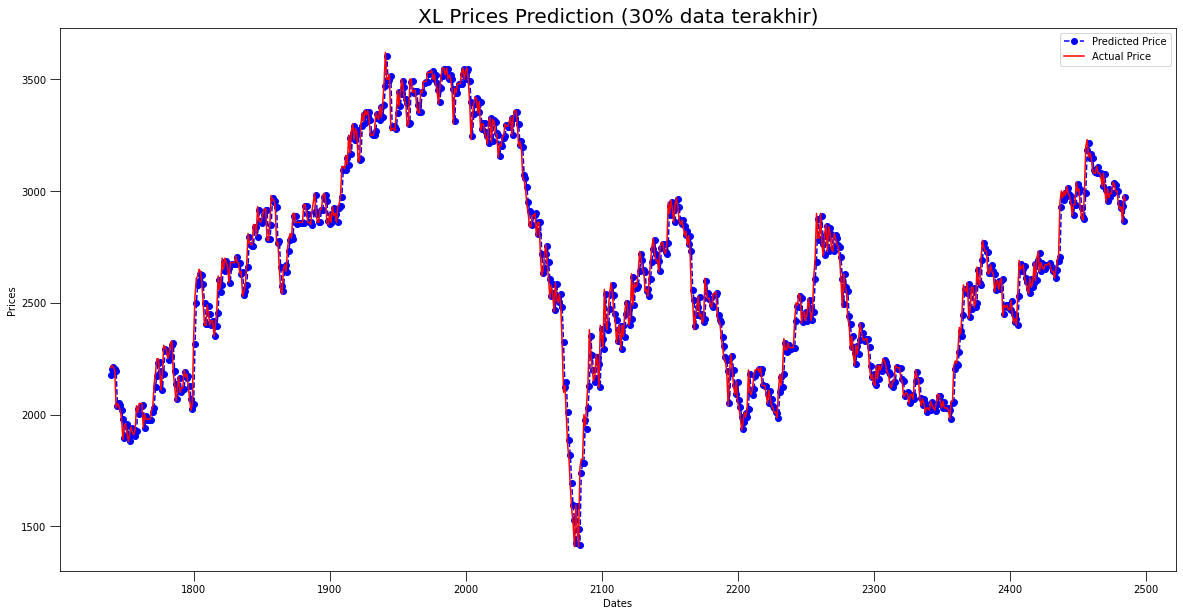

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (2, 0, 0)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 2
ORDER_D = 0
ORDER_Q = 0
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (2, 0, 0)
Testing Mean Squared Error is 15927.808828407378
Testing Rooted Mean Squared Error is 126.20542313390253
Testing Mean Absolute Error is 55.80295634224258


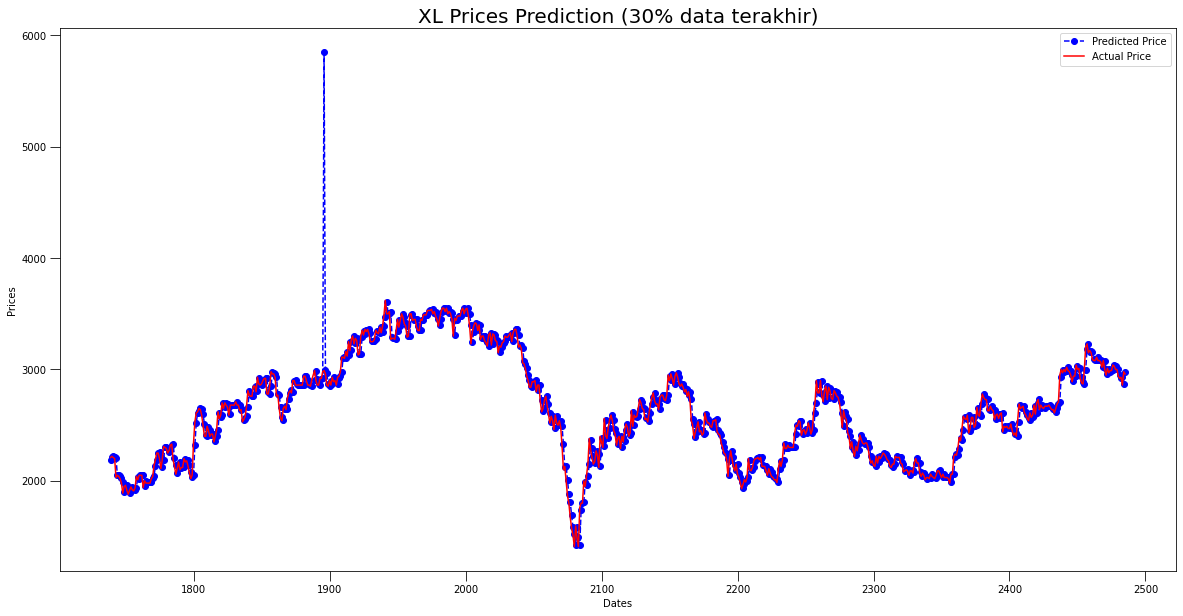

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (2, 0, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 2
ORDER_D = 0
ORDER_Q = 1
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400
time_point: 450
time_point: 500
time_point: 550
time_point: 600
time_point: 650
time_point: 700

ORDER (2, 0, 1)
Testing Mean Squared Error is 4999.885275396685
Testing Rooted Mean Squared Error is 70.70986688855159
Testing Mean Absolute Error is 51.80271151997292


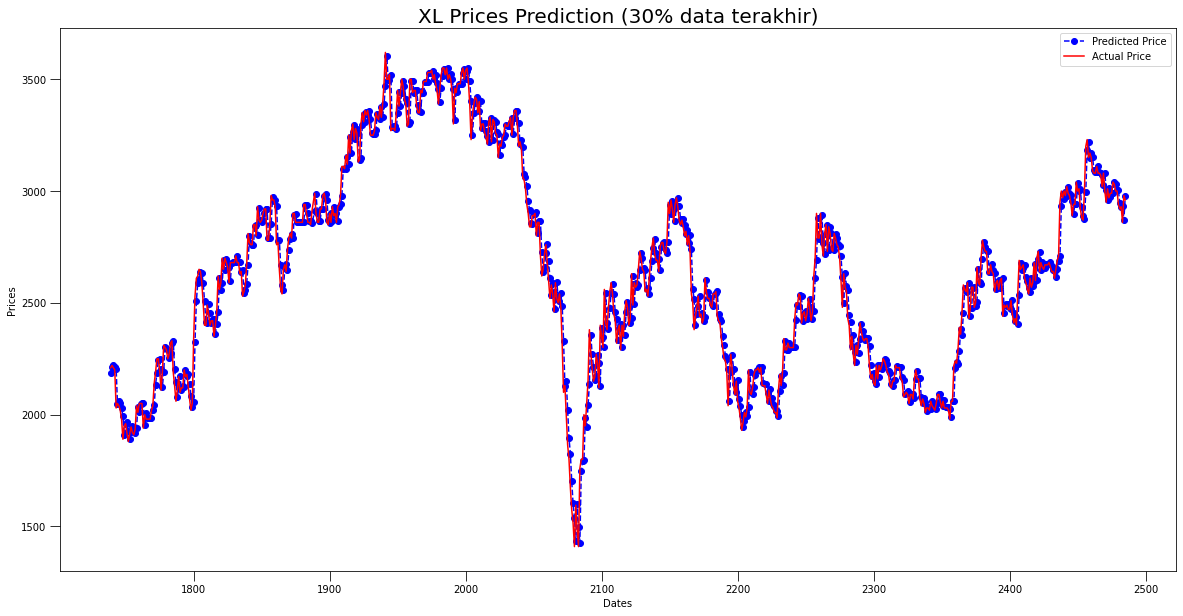

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (2, 0, 2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 2
ORDER_D = 0
ORDER_Q = 2
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0


ValueError: ignored

ValueError: ignored

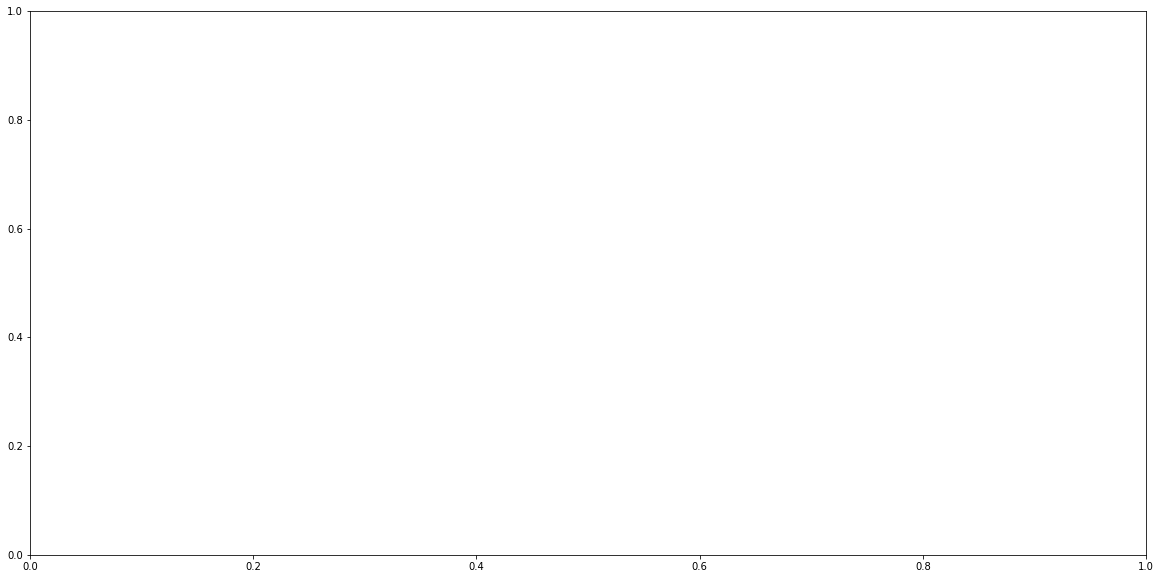

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (2, 1, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 2
ORDER_D = 1
ORDER_Q = 1
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0


ValueError: ignored

ValueError: ignored

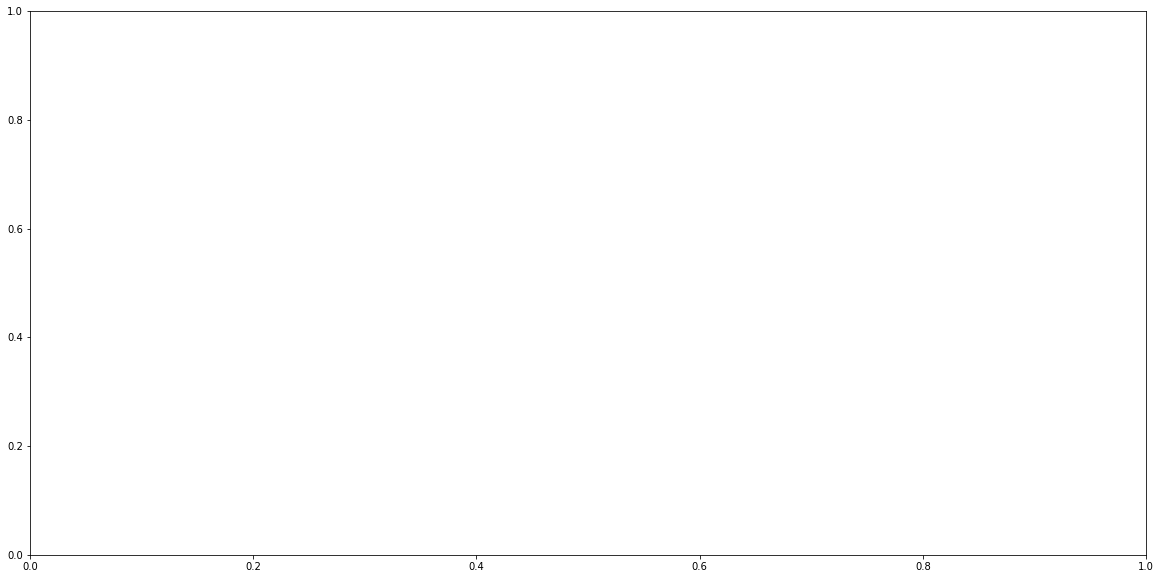

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (2, 1, 2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 2
ORDER_D = 1
ORDER_Q = 2
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0


ValueError: ignored

ValueError: ignored

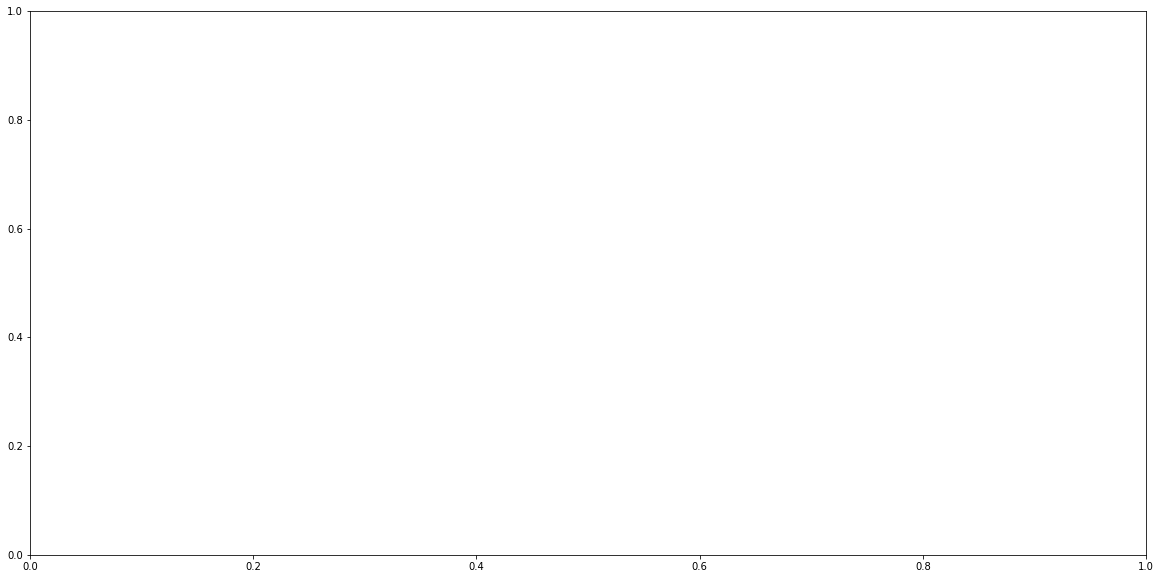

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (2, 2, 1)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 2
ORDER_D = 2
ORDER_Q = 1
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0
time_point: 50
time_point: 100
time_point: 150
time_point: 200
time_point: 250
time_point: 300
time_point: 350
time_point: 400
time_point: 450


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


time_point: 500
time_point: 550


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


time_point: 600
time_point: 650
time_point: 700

ORDER (2, 2, 1)
Testing Mean Squared Error is 5002.886609197854
Testing Rooted Mean Squared Error is 70.73108658290111
Testing Mean Absolute Error is 51.47636420477973


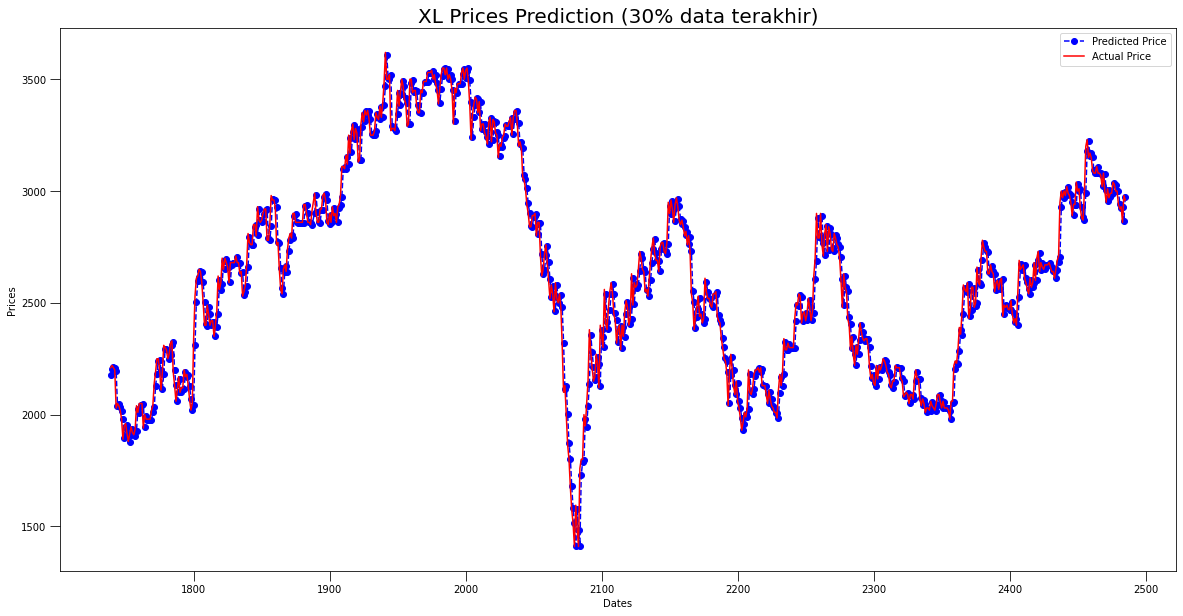

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### ORDER (2, 2, 2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
ORDER_P = 2
ORDER_D = 2
ORDER_Q = 2
for time_point in range(N_test_observations):
    if time_point%50 == 0:
        print("time_point:", time_point) 
    model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
RMSE_error = mean_squared_error(test_data, model_predictions, squared=False)
MAE_error = mean_absolute_error(test_data, model_predictions)
print()
print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Rooted Mean Squared Error is {}'.format(RMSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))

time_point: 0


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist

time_point: 50


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/lo

time_point: 100


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

time_point: 150


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

time_point: 200


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/s

time_point: 250


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/lo

time_point: 300


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

time_point: 350


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist

time_point: 400


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

time_point: 450


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

time_point: 500


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

time_point: 550


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

time_point: 600


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

time_point: 650


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

time_point: 700


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist


ORDER (2, 2, 2)
Testing Mean Squared Error is 5034.028594042222
Testing Rooted Mean Squared Error is 70.95088860643129
Testing Mean Absolute Error is 51.59264106953929


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


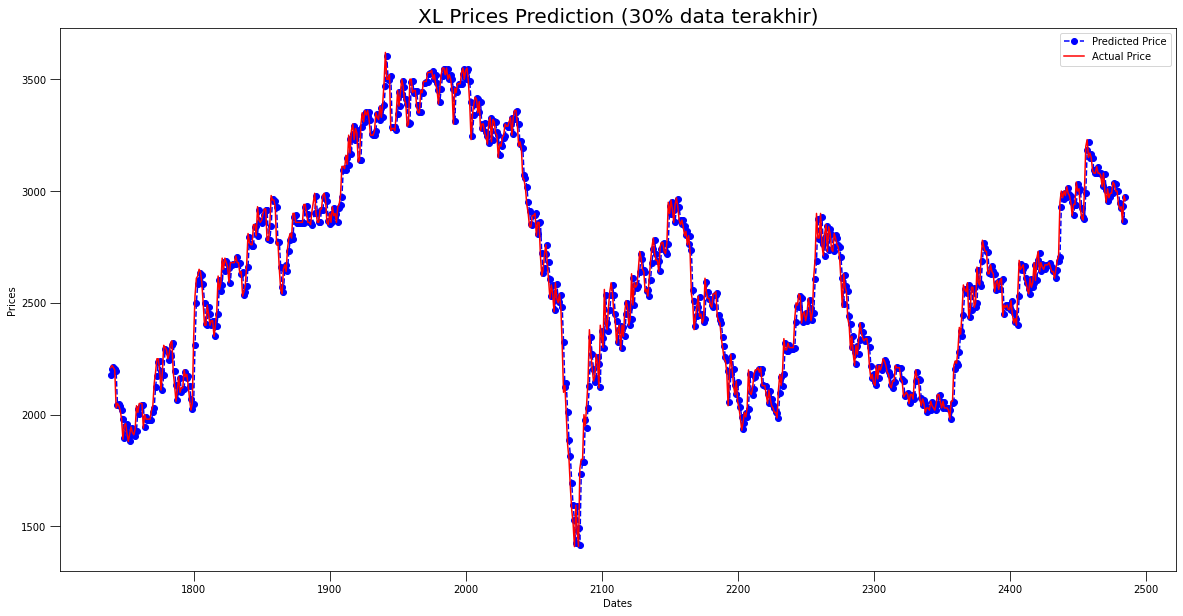

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('XL Prices Prediction (30% data terakhir)', size=20, color="black")
plt.xlabel("Dates", color="black", size=10)
plt.ylabel("Prices", color="black", size=10)
plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
# plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
plt.legend()
plt.show()

### FUNCTION

In [ ]:
import datetime
import time

def run_arima(df, p, d, q, time_point_interval=50, train_split=0.7, plot=False):
  now = time.time()
  if train_split is not None:
    train_data, test_data = df[0:int(len(df)*train_split)], df[int(len(df)*train_split):]
  else:
    train_data, test_data = df[:], df[:]
  training_data = train_data['Close'].values
  test_data = test_data['Close'].values
  history = [x for x in training_data]
  model_predictions = []
  N_test_observations = len(test_data)
  ORDER_P = p
  ORDER_D = d
  ORDER_Q = q
  for time_point in range(N_test_observations):
      if time_point%time_point_interval == 0:
          print("time_point:", time_point) 
      model = ARIMA(history, order=(ORDER_P, ORDER_D, ORDER_Q))
      model_fit = model.fit(disp=0)
      output = model_fit.forecast()
      yhat = output[0]
      model_predictions.append(yhat)
      true_test_value = test_data[time_point]
      history.append(true_test_value)
  MSE_error = mean_squared_error(test_data, model_predictions)
  print()
  print('ORDER ({0}, {1}, {2})'.format(ORDER_P, ORDER_D, ORDER_Q))
  print('Testing Mean Squared Error is {}'.format(MSE_error))
  time_spent = time.time() - now
  print('Time spent:', time_spent)
  ARMAResults.summary(model_fit)
  if plot == True:
    plot_arima(df, model_predictions, test_data=test_data, train_split=train_split, p=p, d=d, q=q)
  return ((p, d, q), MSE_error, test_data, model_predictions, time_spent)

def plot_arima(df, model_predictions, test_data, train_split=0.7, p=None, d=None, q=None):
  if p is None or d is None or q is None:
    return "Provide the order: p, d, and q"
  if train_split is not None:
    test_set_range = df[int(len(df)*train_split):].index
  else:
    train_split = 0
    test_set_range = df[:].index
  assert len(model_predictions) == len(test_data)
  assert len(test_data) == len(test_set_range)
  plt.figure(figsize=(20,10))
  plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
  plt.plot(test_set_range, test_data, color='red', label='Actual Price')
  plt.title(f'XL Prices Prediction ({(1-train_split) * 100}% data terakhir; p={p}, d={d}, q={q})', size=20, color="white")
  plt.xlabel("Dates", color="black", size=10)
  plt.ylabel("Prices", color="black", size=10)
  plt.tick_params(axis='x', colors="black", size=10, labelsize=10)
  plt.tick_params(axis='y', colors="black", size=10, labelsize=10)
  # plt.xticks(np.arange(881,RANGE,50), df.Date[881:RANGE:50])
  plt.legend()
  plt.show()

### References
[Time-Series Forecasting: Predicting Stock Prices Using An ARIMA Model](https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70)

### Next Notebook
[Prediksi Harga Tutup Saham XL dengan ARIMA Model (100% Training dan Testing Data)](https://colab.research.google.com/drive/1KIOAhZduqTGEFx-IoTP3YZU9thB4Eg7d?usp=sharing)

In [ ]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:        10865688 kB
MemAvailable:   12521624 kB
Buffers:          118984 kB
Cached:          1680076 kB
SwapCached:            0 kB
Active:           933524 kB
Inactive:        1299304 kB
Active(anon):     391096 kB
Inactive(anon):      448 kB
Active(file):     542428 kB
Inactive(file):  1298856 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               540 kB
Writeback:             0 kB
AnonPages:        433664 kB
Mapped:           238564 kB
Shmem:              1172 kB
KReclaimable:     112256 kB
Slab:             154808 kB
SReclaimable:     112256 kB
SUnreclaim:        42552 kB
KernelStack:        4688 kB
PageTables:         5888 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3102156 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        7084 kB
VmallocChunk:          0 kB
Percpu:          